In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

import numpy as np

from minefield import Minefield
from network import DQ_Sweeper

from tqdm import tqdm

rewards = {'safe_reward' : 15, 
          'repeat_loss' : -5, 
          'mine_loss' : -10, 
          'completion_reward' : 30}
env = Minefield(8, 8, 10, **rewards)

filters = [10, 8, 5]
sizes = [5, 5, 5]
env_shape = (8, 8, 11)

model = DQ_Sweeper(env, filters, sizes, 0.9, 0.9995, 10, 0.2)

In [2]:
model.training_loop(100000, 128)

 10%|▉         | 9998/100000 [20:56<2:32:39,  9.83it/s] 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Models/model_10000_49_12_15Jun21/assets


 20%|█▉        | 19999/100000 [47:27<3:20:30,  6.65it/s] 

INFO:tensorflow:Assets written to: Models/model_20000_15_13_15Jun21/assets


 30%|██▉       | 29999/100000 [1:22:56<3:11:17,  6.10it/s] 

INFO:tensorflow:Assets written to: Models/model_30000_51_13_15Jun21/assets


 40%|███▉      | 39999/100000 [2:06:35<4:01:06,  4.15it/s] 

INFO:tensorflow:Assets written to: Models/model_40000_34_14_15Jun21/assets


 50%|████▉     | 49999/100000 [2:56:28<4:47:20,  2.90it/s] 

INFO:tensorflow:Assets written to: Models/model_50000_24_15_15Jun21/assets


 60%|█████▉    | 59999/100000 [3:52:46<4:20:56,  2.55it/s] 

INFO:tensorflow:Assets written to: Models/model_60000_20_16_15Jun21/assets


 70%|██████▉   | 69999/100000 [4:51:42<1:44:40,  4.78it/s] 

INFO:tensorflow:Assets written to: Models/model_70000_19_17_15Jun21/assets


 80%|███████▉  | 79999/100000 [5:52:19<2:06:21,  2.64it/s] 

INFO:tensorflow:Assets written to: Models/model_80000_20_18_15Jun21/assets


 90%|████████▉ | 89999/100000 [6:56:31<44:10,  3.77it/s]  

INFO:tensorflow:Assets written to: Models/model_90000_24_19_15Jun21/assets


100%|█████████▉| 99999/100000 [8:01:49<00:00,  2.80it/s]  

INFO:tensorflow:Assets written to: Models/model_100000_29_20_15Jun21/assets


100%|██████████| 100000/100000 [8:01:52<00:00,  3.46it/s]


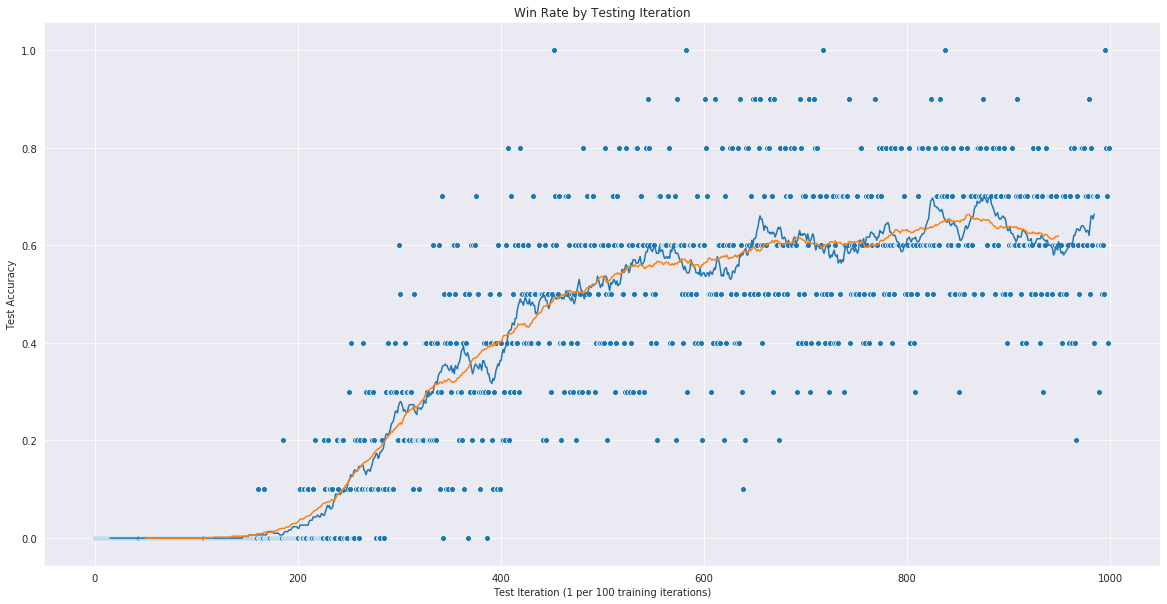

In [19]:
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(x = np.arange(len(model.logger.tests)), y = model.logger.tests)

test_arr = np.array(model.logger.tests)

def n_moving_avg(scores, n):
    cs = scores.cumsum()

    moving_avg = (cs[n:] - cs[:-n])/n
    return moving_avg

n1 = 30
n2 = 100

sns.lineplot(x = np.arange(len(model.logger.tests) - n1) + n1/2, y = n_moving_avg(test_arr, n1))
sns.lineplot(x = np.arange(len(model.logger.tests) - n2) + n2/2, y = n_moving_avg(test_arr, n2))

ax.set_title('Win Rate by Testing Iteration')

ax.set_xlabel('Test Iteration (1 per 100 training iterations)')
ax.set_ylabel('Test Accuracy')

plt.savefig('TestScores.png')

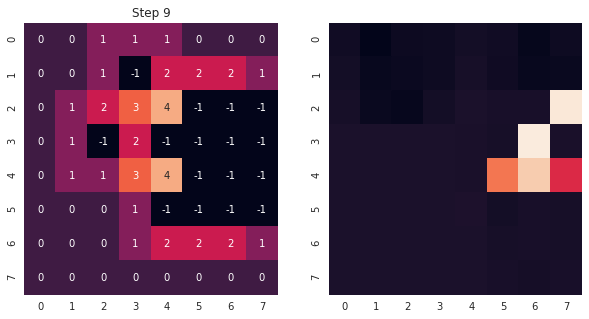

In [17]:
model.show_single('hundok')

In [5]:
env3 = Minefield(10, 10, 30, **rewards)

model3 = DQ_Sweeper(env3, filters, sizes, 0.01, 1, 100, 0.2, weights = 'model_June09')

model3.show_single('bigger_hundok')

OSError: SavedModel file does not exist at: model_June09/{saved_model.pbtxt|saved_model.pb}

In [ ]:
0.9995**10000